# Estimating cascade rates from advective structure functions

This example will guide you through each step necessary to estimate energy and enstrophy cascade rates from a 2D simulation of surface ocean velocity. 

**General procedure:**

1. Load a dataset generated with GeophysicalFlows.jl
2. Format the dataset
3. Calculate velocity-based and scalar-based structure functions for the zonal and meridional directions as a function of separation distance
4. Estimate energy and enstrophy cascade rates from the structure functions
5. Plot the cascade rates in each direction as a function of separation distance

In [72]:
import matplotlib_inline.backend_inline
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

## Load the dataset generated with GeophysicalFlows.jl
We will use `h5py` to load a `.jld2` file, the output from `GeophysicalFlows.jl`, a numerical ocean simulator written in Julia.

In [58]:
import h5py
   
f = h5py.File('sample_data/2layer_128.jld2', 'r')
grid = f['grid']
snapshots = f['snapshots']

# Initialize the grid of x and y coordinates
x = grid['x'][()]
y = grid['y'][()]

# Grab the top layer and final snapshot of the simulation for u, v, and q
u = snapshots['u']['20050'][0]
v = snapshots['v']['20050'][0]
q = snapshots['q']['20050'][0]

Make a couple of quick plots to see the velocity fields.

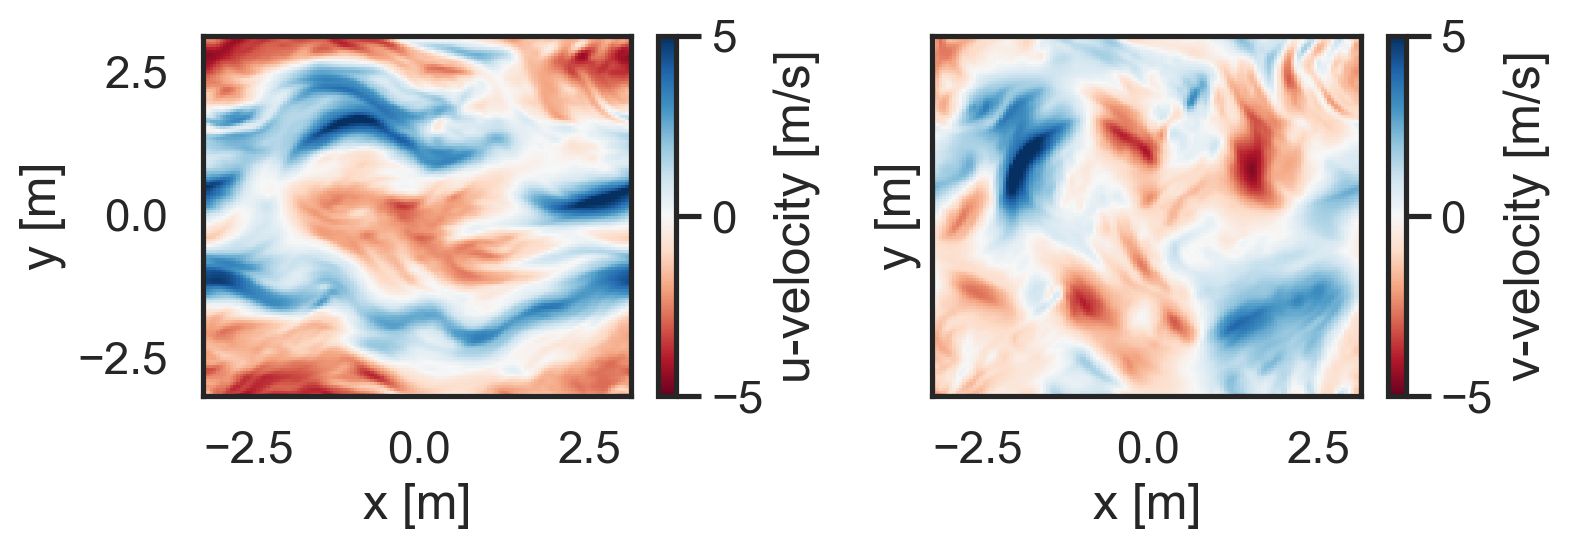

In [63]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(8,3))
p1 = ax1.pcolormesh(x,y,u, cmap='RdBu',vmin=-5,vmax=5)
p2 = ax2.pcolormesh(x,y,v, cmap='RdBu',vmin=-5,vmax=5)
fig.colorbar(p1,label='u-velocity [m/s]')
fig.colorbar(p2, label='v-velocity [m/s]')
ax1.set_xlabel('x [m]')
ax2.set_xlabel('x [m]')
ax1.set_ylabel('y [m]')
ax2.set_ylabel('y [m]')
plt.tight_layout()

## Calculate advective velocity structure functions


In [60]:
import oceans_sf as ocsf

sf = ocsf.generate_structure_functions(u, v, x, y)

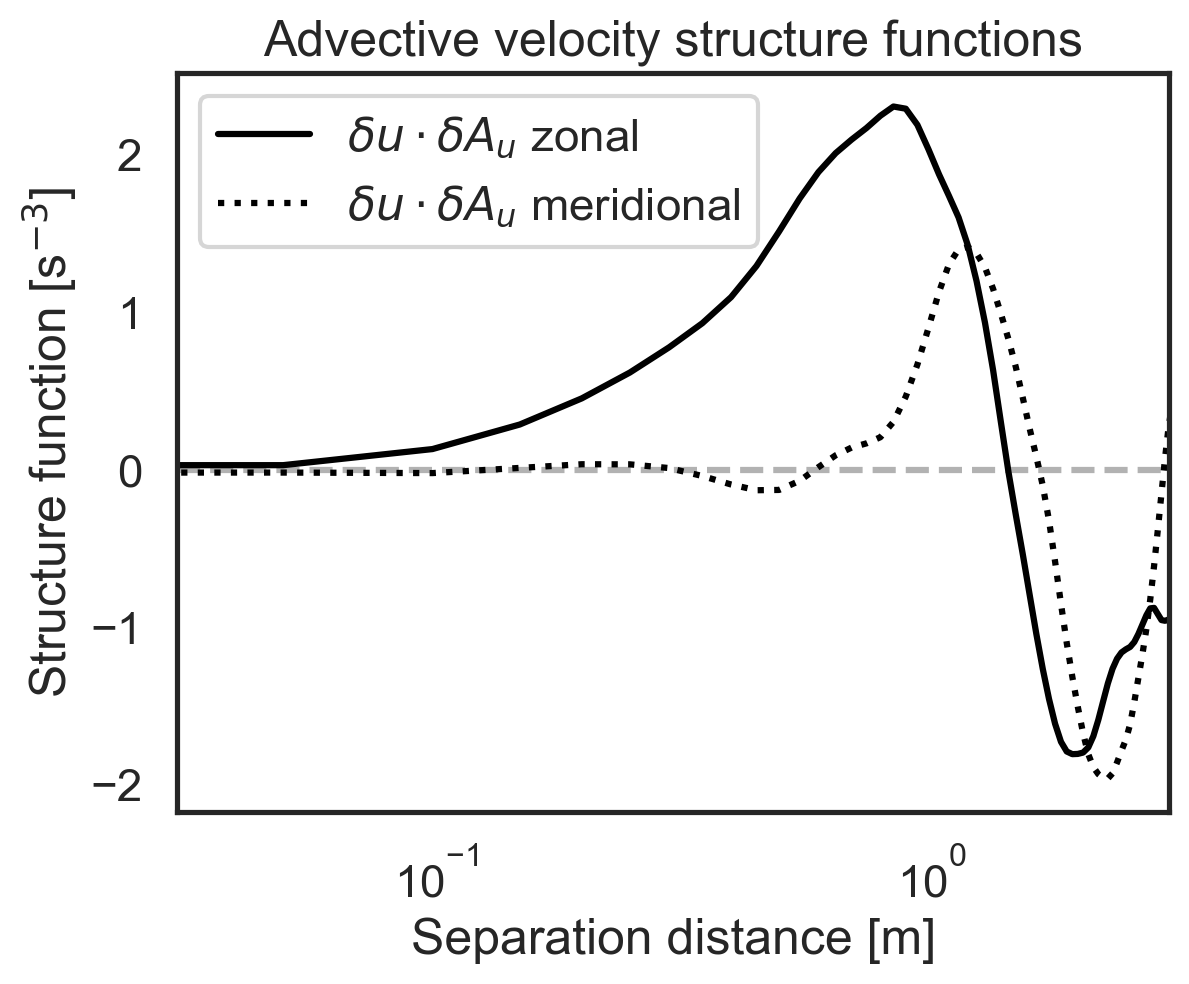

In [64]:
fig, (ax1) = plt.subplots()


ax1.semilogx(sf['x-diffs'], sf['SF_advection_velocity_zonal'],
             label=r'$\delta u\cdot\delta A_u$ zonal',color='k')
ax1.semilogx(sf['y-diffs'], sf['SF_advection_velocity_meridional'], 
             label=r'$\delta u\cdot\delta A_u$ meridional',
             color='k',linestyle='dotted')

ax1.set_ylabel(r"Structure function [s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',linestyle='dashed',alpha=0.3)
plt.title('Advective velocity structure functions');

For advective velocity-based structure functions, multiply by -1/2 to get the energy cascade rate.

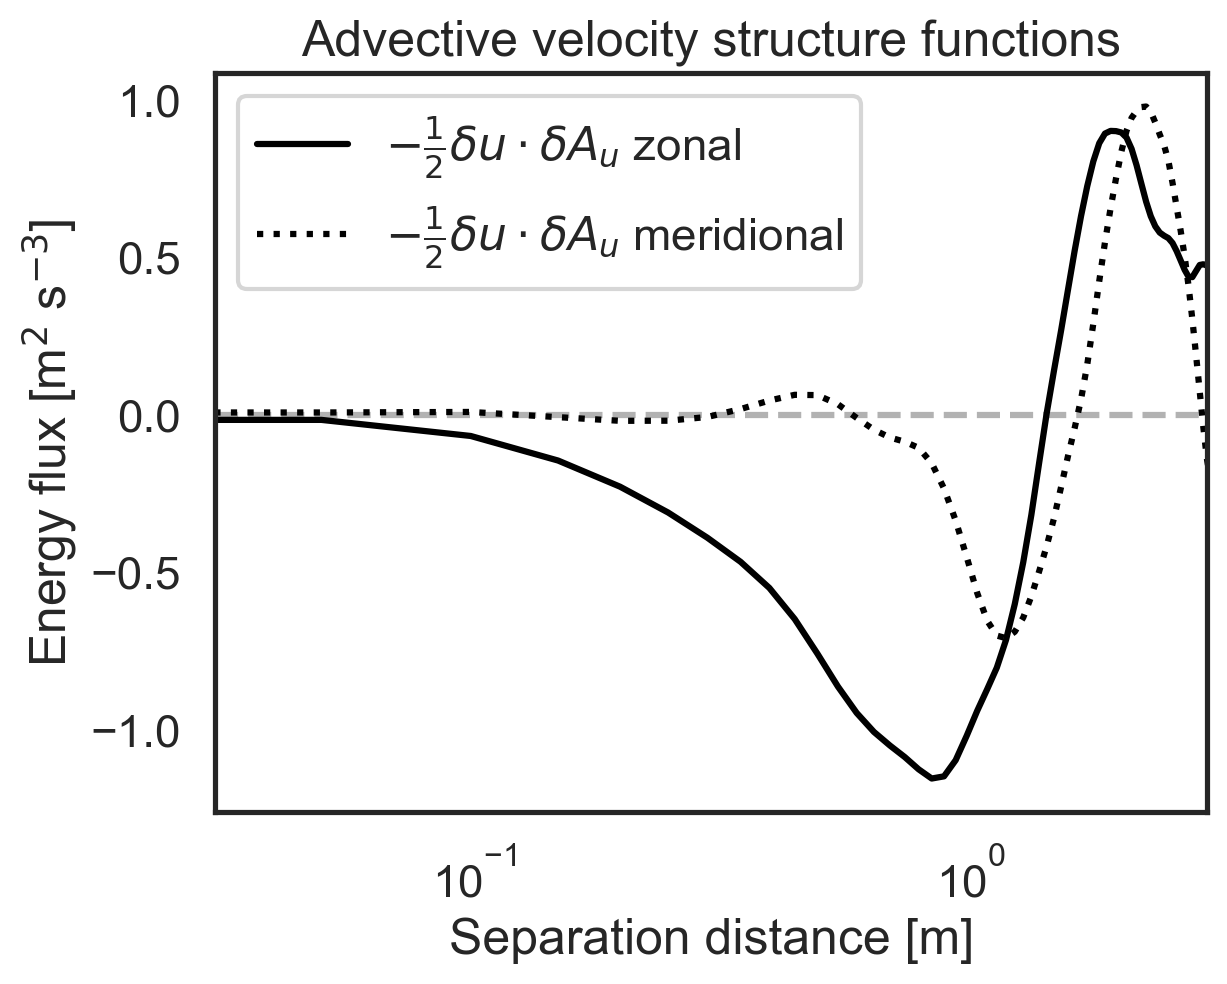

In [66]:
fig, (ax1) = plt.subplots()

ax1.semilogx(sf['x-diffs'], -sf['SF_advection_velocity_zonal']/2,
             label=r'$-\frac{1}{2} \delta u\cdot\delta A_u$ zonal',
             color='k')
ax1.semilogx(sf['y-diffs'], -sf['SF_advection_velocity_meridional']/2, 
             label=r'$-\frac{1}{2} \delta u\cdot\delta A_u$ meridional',
             color='k', linestyle='dotted')

ax1.set_ylabel(r"Energy flux [m$^2$ s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',linestyle='dashed',alpha=0.3)
plt.title('Advective velocity structure functions');

## Calculating scalar-based structure functions and traditional structure functions
We can repeat the above steps with additional inputs to calculate advective structure functions from scalar fields as well as traditional nth order structure functions. Here we will calculate the 3rd order traditional structure functions since these can be related to cascade rates.

In [53]:
sf_all = ocsf.generate_structure_functions(u, v, x, y, scalar=q, traditional_order=3)

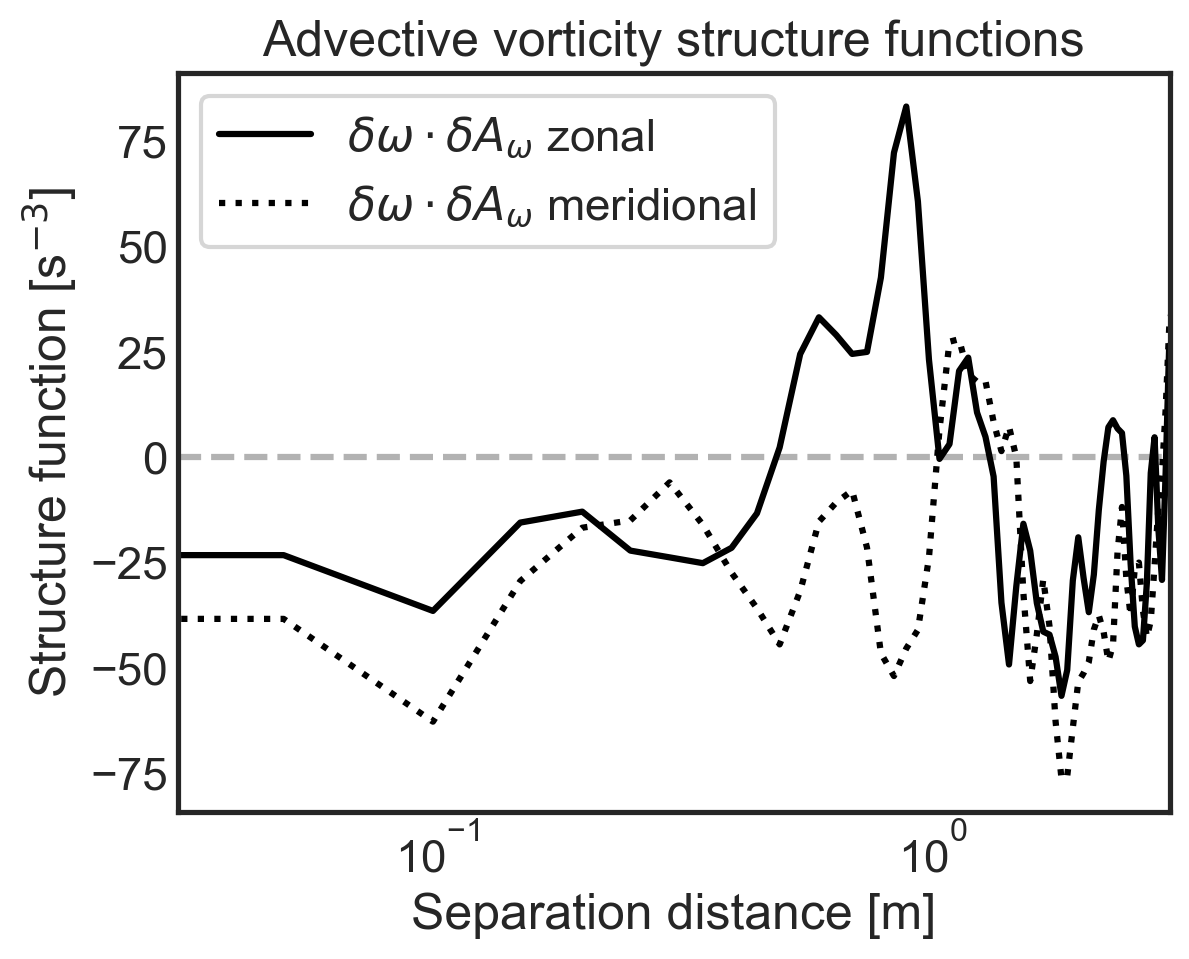

In [67]:
fig, (ax1) = plt.subplots()


ax1.semilogx(sf_all['x-diffs'], sf_all['SF_advection_scalar_zonal'],
             label=r'$\delta \omega\cdot\delta A_{\omega}$ zonal',
             color='k')
ax1.semilogx(sf_all['y-diffs'], sf_all['SF_advection_scalar_meridional'], 
             label=r'$\delta \omega\cdot\delta A_{\omega}$ meridional',
             color='k', linestyle='dotted')

ax1.set_ylabel(r"Structure function [s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',linestyle='dashed',alpha=0.3)
ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
plt.title('Advective vorticity structure functions');

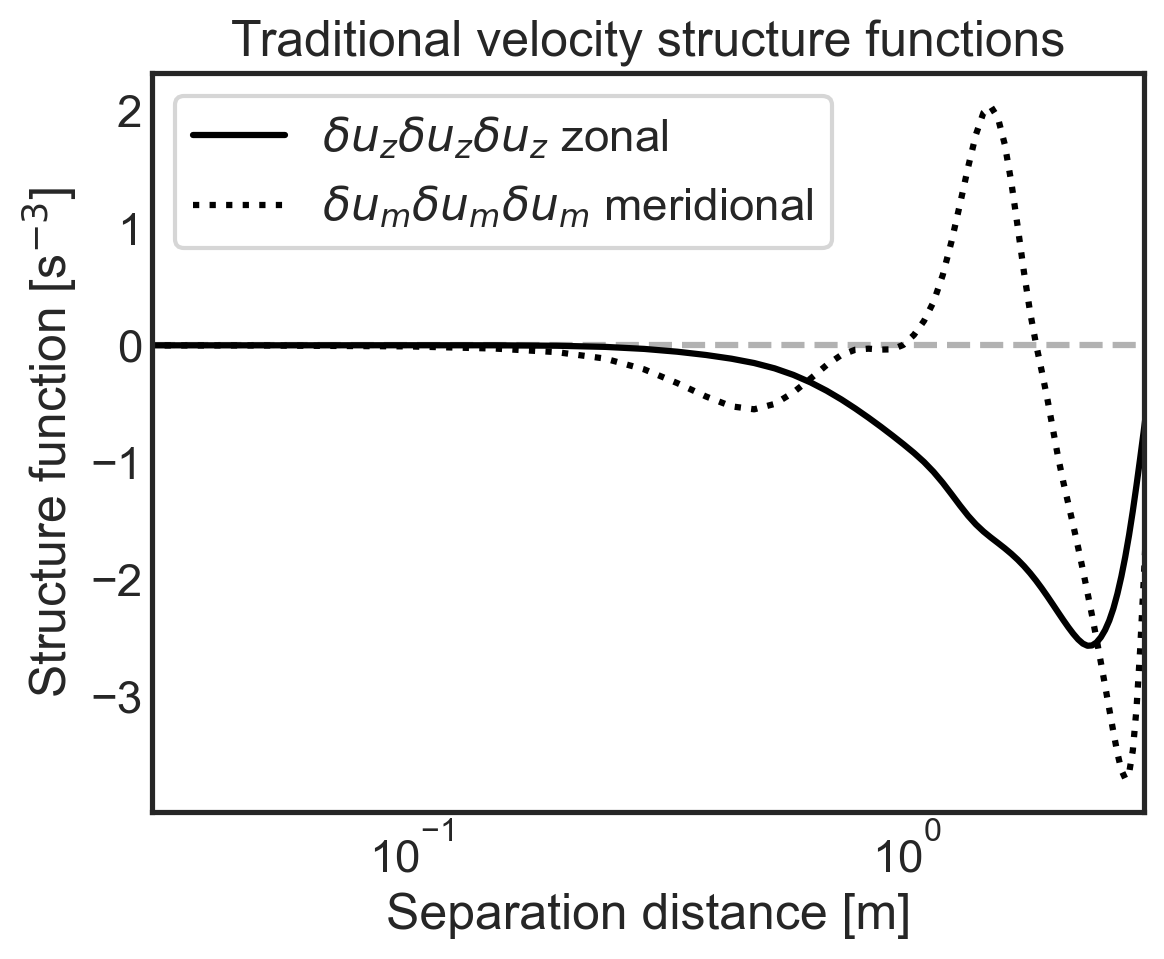

In [68]:
fig, (ax1) = plt.subplots()


ax1.semilogx(sf_all['x-diffs'], sf_all['SF_traditional_velocity_zonal'],
             label=r'$\delta u_z \delta u_z \delta u_z$ zonal',
             color='k')
ax1.semilogx(sf_all['y-diffs'], sf_all['SF_traditional_velocity_meridional'], 
             label=r'$\delta u_m \delta u_m \delta u_m$ meridional',
             color='k',linestyle='dotted')

ax1.set_ylabel(r"Structure function [s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',linestyle='dashed',alpha=0.3)
ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
plt.title('Traditional velocity structure functions');

**Note: The current method for calculating the traditional vorticity structure function is not recommended and we instead suggest a mixed structure function (in development).**

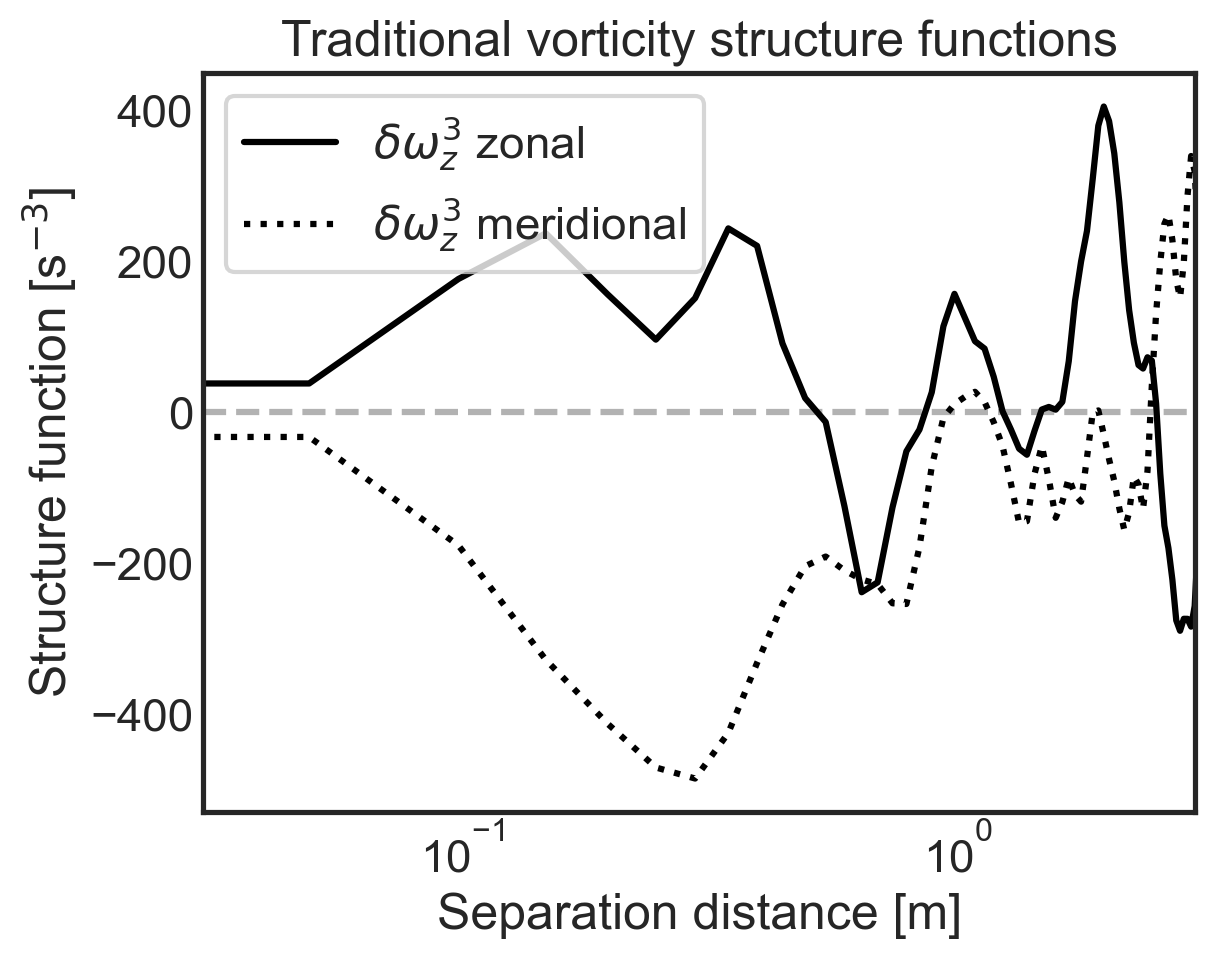

In [70]:
fig, (ax1) = plt.subplots()


ax1.semilogx(sf_all['x-diffs'], sf_all['SF_traditional_scalar_zonal'],
             label=r'$\delta \omega_z^3$ zonal',
             color='k')
ax1.semilogx(sf_all['y-diffs'], sf_all['SF_traditional_scalar_meridional'], 
             label=r'$\delta \omega_z^3$ meridional',
             color='k', linestyle='dotted')

ax1.set_ylabel(r"Structure function [s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',linestyle='dashed',alpha=0.3)
ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
plt.title('Traditional vorticity structure functions');